In [58]:
import cv2
import tf_explain
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tf_explain.core.grad_cam import GradCAM

In [4]:
color_model = tf.keras.models.load_model('../models/color_model')

In [9]:
data = np.load('rois.npy', allow_pickle=True)

In [23]:
data1 = np.array(list(filter(lambda x: x.shape[0]*x.shape[1] > 125*100, data)))
data1.shape

<ipython-input-23-1e6474d7a637>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data1 = np.array(list(filter(lambda x: x.shape[0]*x.shape[1] > 125*100, data)))


In [70]:
blue = data1[6]
blue_label = 2
red = data1[57]
red_label = 0
yellow = data1[29]
yellow_label = 1

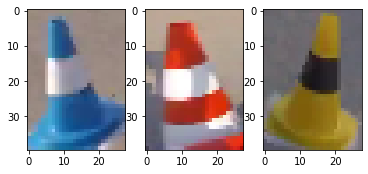

In [71]:
fig, ax = plt.subplots(1,3)
ax[0].imshow(cv2.resize(blue, (28,40)))
ax[1].imshow(cv2.resize(red, (28,40)))
ax[2].imshow(cv2.resize(yellow, (28,40)))

In [72]:
model = tf.keras.models.load_model('./color_model')

In [73]:
explainer_grad_cam = GradCAM()
explainer_gradients_inputs = GradientsInputs()

In [74]:
blue_data = (cv2.resize(blue, (28,40)).reshape(1,40,28,3).astype(np.float32) / 255, None)
red_data = (cv2.resize(red, (28,40)).reshape(1,40,28,3).astype(np.float32) / 255, None)
yellow_data = (cv2.resize(yellow, (28,40)).reshape(1,40,28,3).astype(np.float32) / 255, None)

In [115]:
blue_grad_cam_grid = explainer_grad_cam.explain(blue_data, model, blue_label, image_weight=0.5)
red_grad_cam_grid = explainer_grad_cam.explain(red_data, model, red_label, image_weight=0.5)
yellow_grad_cam_grid = explainer_grad_cam.explain(yellow_data, model, yellow_label, image_weight=0.5)

In [88]:
model.predict([cv2.resize(blue, (28,40)).reshape(1,40,28,3).astype(np.float32) / 255])

array([[9.6257852e-04, 9.0272715e-06, 9.9902844e-01]], dtype=float32)

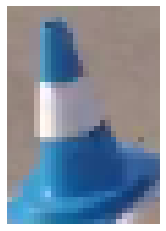

In [92]:
plt.imshow(cv2.resize(blue, (28,40)))
# plt.axis('off')
# plt.savefig("blue_cone.png", bbox_inches='tight')

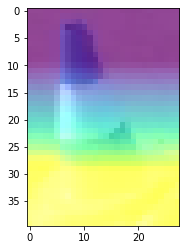

In [116]:
plt.imshow(blue_grad_cam_grid)
# plt.axis('off')
# plt.savefig("blue_cone_pred.png", bbox_inches='tight')

In [89]:
model.predict([cv2.resize(red, (28,40)).reshape(1,40,28,3).astype(np.float32) / 255])

array([[9.9912208e-01, 4.1229800e-06, 8.7380066e-04]], dtype=float32)

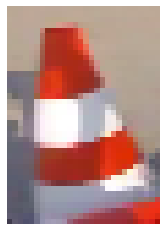

In [94]:
plt.imshow(cv2.resize(red, (28,40)))
# plt.axis('off')
# plt.savefig("red_cone.png", bbox_inches='tight')

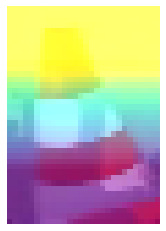

In [95]:
plt.imshow(red_grad_cam_grid)
# plt.axis('off')
# plt.savefig("red_cone_pred.png", bbox_inches='tight')

In [90]:
model.predict([cv2.resize(yellow, (28,40)).reshape(1,40,28,3).astype(np.float32) / 255])

array([[5.3603679e-04, 9.9946326e-01, 7.2043639e-07]], dtype=float32)

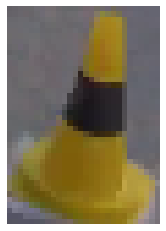

In [98]:
plt.imshow(cv2.resize(yellow, (28,40)))
# plt.axis('off')
# plt.savefig("yellow_cone.png", bbox_inches='tight')

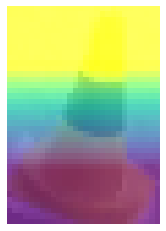

In [96]:
plt.imshow(yellow_grad_cam_grid)
# plt.axis('off')
# plt.savefig("yellow_cone_pred.png", bbox_inches='tight')